In [106]:
import Mors as mors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nbimporter
import Functions as fun
import os

In [107]:
Lxuv = mors.Lxuv(Mstar=1.0, Age=1, Omega=10.0)

In [108]:
#Comparing to Tu et al. Figure 4
ages = np.linspace(1,5000,10000)
data = pd.read_csv('RefinedCHZ_data.csv')
masses,chz = data['Mass'],data['CHZ']

solar_mass_10 = mors.Load(os.path.join('rp10',sorted(os.listdir('rp10'))[-1]))
solar_mass_50 = mors.Load(os.path.join('rp50',sorted(os.listdir('rp50'))[-1]))
solar_mass_90 = mors.Load(os.path.join('rp90',sorted(os.listdir('rp90'))[-1]))

solar_mass_stars = [solar_mass_10,solar_mass_50,solar_mass_90]
solar_mass_50.Mstar = 1

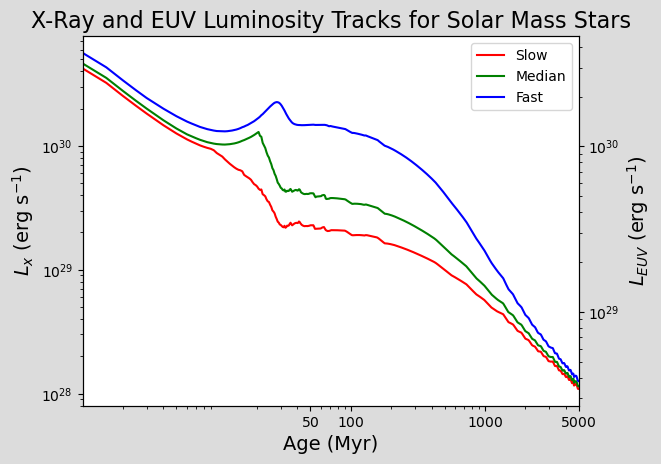

In [109]:
LxTracks = np.array(list(fun.LxTrack(ages,solar_mass_stars).values()))
LeuvTracks = np.array(list(fun.LeuvTrack(ages,solar_mass_stars).values()))

colors = ['red','green','blue']
labels = ['Slow','Median','Fast']

fig, ax1 = plt.subplots(facecolor='gainsboro')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(ages[0],ages[-1])


ax2 = ax1.twinx()
ax2.tick_params(axis='y')
ax2.set_yscale('log')

for i,(lxtrack,leuvtrack) in enumerate(zip(LxTracks,LeuvTracks)):
    ax2.plot(ages, leuvtrack, color = colors[i],alpha=0)
    ax1.plot(ages, lxtrack, color = colors[i],label=labels[i])
    
plt.title('X-Ray and EUV Luminosity Tracks for Solar Mass Stars',fontsize=16)
ax1.set_ylabel(r'$L_{x}$ (erg s$^{-1}$)',fontsize=14)
ax2.set_ylabel(r'$L_{EUV}$ (erg s$^{-1}$)',fontsize=14)

tick_positions = [50,100,1000,5000]
ax1.set_xticks(tick_positions, [r'$50$',r'$100$',r'$1000$',r'$5000$'])
ax1.set_xlabel('Age (Myr)', fontsize=14)
ax1.legend()
plt.savefig('XUV_lum_tu.png',bbox_inches='tight')

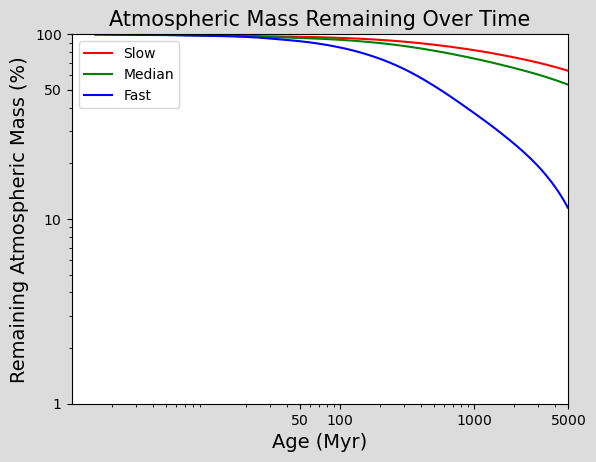

In [110]:
mlr=fun.massLost(ages, solar_mass_stars, efficiency=0.3, M_pl=0.5, R_pl=fun.findRadius([0.5]), chz=np.array([1]), R_atm_frac = 0.1, M_atm_frac = 5e-3)
speeds = ['Slow','Median','Fast']
colors = ['red','green','blue']
plt.figure(facecolor='gainsboro')
for i,star in enumerate(solar_mass_stars):
    plt.plot(ages[1:],mlr[i], color=colors[i],label=speeds[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(ages[0],ages[-1])
    plt.ylim(1,100)

plt.title('Atmospheric Mass Remaining Over Time',fontsize=15)
plt.xlabel('Age (Myr)',fontsize=14)
plt.ylabel('Remaining Atmospheric Mass (%)',fontsize=14)

tick_positions = [50,100,1000,5000]
plt.xticks(tick_positions, [r'$50$',r'$100$',r'$1000$',r'$5000$'])

y_ticks = [1,10,50,100]
plt.yticks(y_ticks, [r'$1$',r'$10$',r'$50$',r'$100$'])
plt.legend()

plt.savefig('atm_rem_tu.png',bbox_inches='tight')

In [6]:
fun.findRadius([0.5])

array([0.82359102])

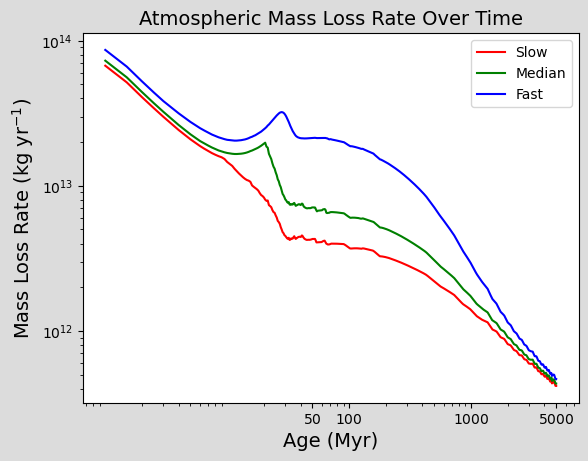

In [111]:
#mass loss rates for planet from tu et al.
mdots = fun.Mdot(ages,solar_mass_stars,0.3,0.5,fun.findRadius([0.5]),chz=np.array([1]),R_atm_frac=0.1,M_atm_frac=5e-3)
plt.figure(facecolor='gainsboro')
speeds = ['Slow','Median','Fast']
colors = ['red','green','blue']
for mdot,c,s in zip(mdots,colors,speeds):
    plt.plot(ages,mdot,color=c,label=s)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mass Loss Rate (kg yr$^{-1}$)',fontsize=14)
plt.xlabel('Age (Myr)',fontsize=14)
plt.title("Atmospheric Mass Loss Rate Over Time",fontsize=14)
tick_positions = [50,100,1000,5000]
plt.xticks(tick_positions, [r'$50$',r'$100$',r'$1000$',r'$5000$'])
plt.legend()

plt.savefig('my_mlr_tu.png',bbox_inches='tight')

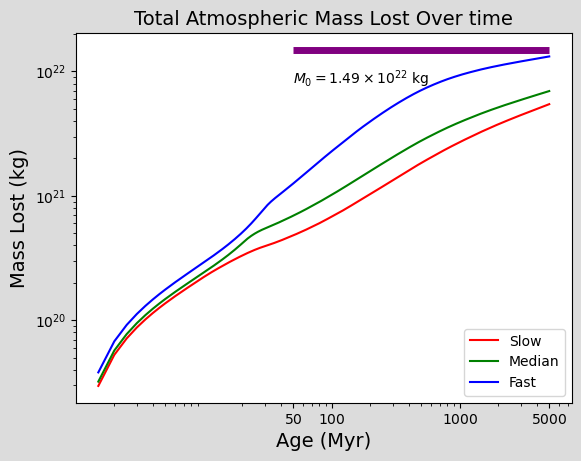

In [112]:
#total mass lost for the planet form tu et al.
mass_lost = fun.totalMassLost(ages,solar_mass_stars,0.3,0.5,fun.findRadius([0.5]),np.array([1]),0.1,5e-3)
plt.figure(facecolor='gainsboro')
speeds = ['Slow','Median','Fast']
colors = ['red','green','blue']
for ml,c,s in zip(mass_lost,colors,speeds):
    plt.plot(ages[1:],ml,color=c,label=s)

plt.hlines(y=1.49e22,xmin=50,xmax=5000,linewidth=5,color='purple')
plt.text(50,8e21,r'$M_0 = 1.49 \times 10^{22}$ kg')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mass Lost (kg)',fontsize=14)
plt.xlabel('Age (Myr)',fontsize=14)
plt.title("Total Atmospheric Mass Lost Over time",fontsize=14)
tick_positions = [50,100,1000,5000]
plt.xticks(tick_positions, [r'$50$',r'$100$',r'$1000$',r'$5000$'])
plt.legend(loc='lower right')
plt.savefig('total_ml_tu.png',bbox_inches='tight')

In [113]:
ages = np.linspace(1,5000,10000)
data = pd.read_csv('updated.csv')
masses,chz = data['Mass'],data['CHZ']
stars10 = []
stars25 = []
stars30 = []
stars35 = []
stars40 = []
stars45 = []
stars50 = []
stars55 = []
stars60 = []
stars65 = []
stars70 = []
stars75 = []
stars90 = []

for i,star in enumerate(sorted(os.listdir('rp10'))):
    file_path = os.path.join('rp10', star)
    try:    
        stars10.append(mors.Load(file_path))
    except:
        pass

for i,star in enumerate(sorted(os.listdir('rp25'))):
    file_path = os.path.join('rp25', star)
    stars25.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp30'))):
    file_path = os.path.join('rp30', star)
    stars30.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp35'))):
    file_path = os.path.join('rp35', star)
    stars35.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp40'))):
    file_path = os.path.join('rp40', star)
    stars40.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp45'))):
    file_path = os.path.join('rp45', star)
    stars45.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp50'))):
    file_path = os.path.join('rp50', star)
    stars50.append(mors.Load(file_path))


for i,star in enumerate(sorted(os.listdir('rp55'))):
    file_path = os.path.join('rp55', star)
    stars55.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp60'))):
    file_path = os.path.join('rp60', star)
    stars60.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp65'))):
    file_path = os.path.join('rp65', star)
    stars65.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp70'))):
    file_path = os.path.join('rp70', star)
    stars70.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp75'))):
    file_path = os.path.join('rp75', star)
    stars75.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp90'))):
    file_path = os.path.join('rp90', star)
    try:
        stars90.append(mors.Load(file_path))
    except:
        pass

stars = [stars10,stars25,stars50,stars75,stars90]

In [114]:
#varying rotation and stellar mass
stars_03 = []
stars_05 = []
stars_07 = []
stars_09 = []
for list_of_stars in stars:
    for star in list_of_stars:
        if round(star.Mstar,2) == 0.3:
            stars_03.append(star)
        elif round(star.Mstar,2) == 0.5:
            stars_05.append(star)
        elif round(star.Mstar,2) == 0.7:
            stars_07.append(star)
        elif round(star.Mstar,2) == 0.9:
            stars_09.append(star)

chz_less_masses = np.array([data['CHZ'][round(data['Mass'],2) == 0.3].values[0], 
                   data['CHZ'][round(data['Mass'],2) == 0.5].values[0],
                   data['CHZ'][round(data['Mass'],2) == 0.7].values[0],
                   data['CHZ'][round(data['Mass'],2) == 0.9].values[0]])
special_stars = [stars_03,stars_05,stars_07,stars_09]

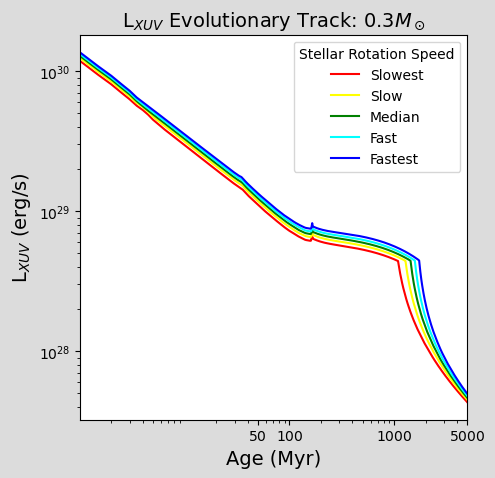

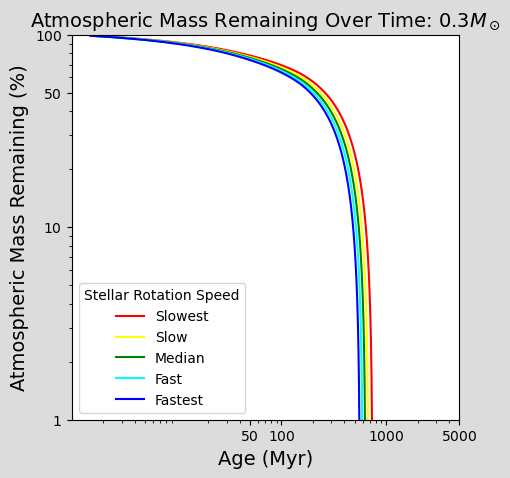

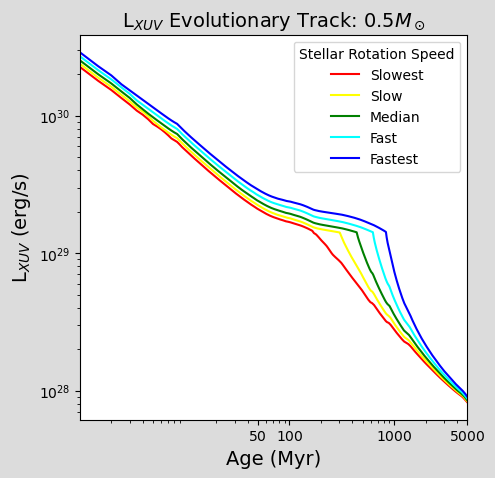

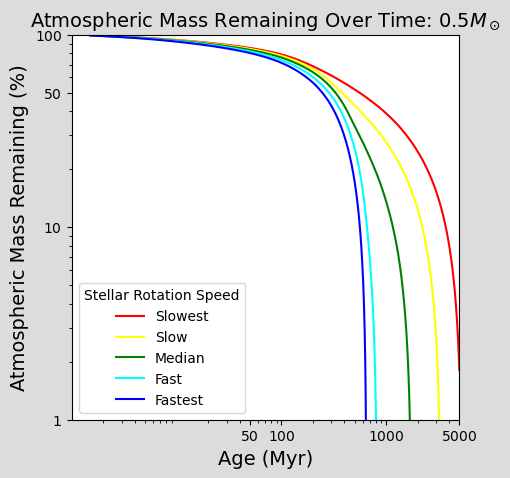

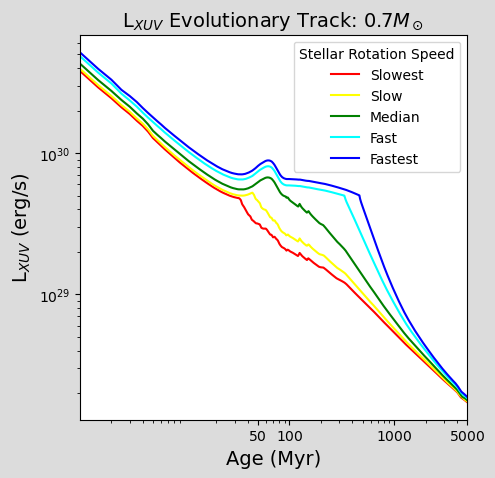

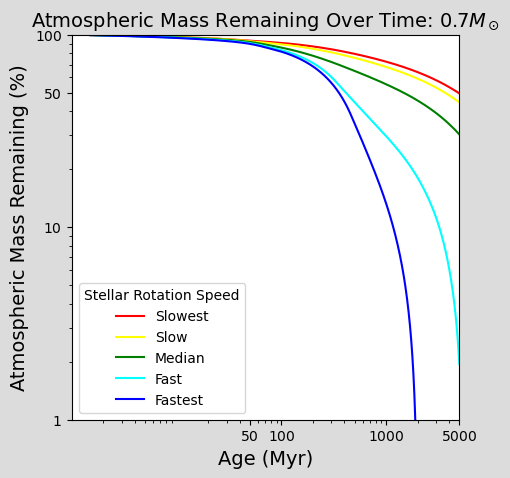

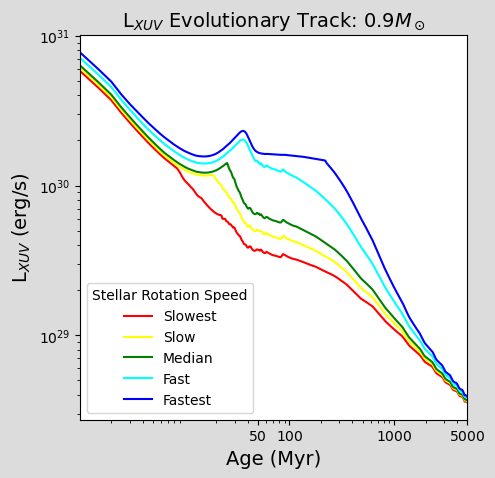

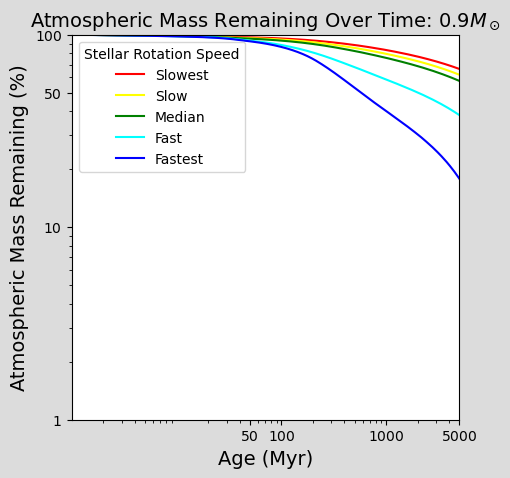

In [115]:
for i,star_list in enumerate(special_stars):
    fun.plotByRot(ages,star_list,0.3,0.5,fun.findRadius([0.5]),np.array([chz_less_masses[i]]),0.1,5e-3,plotMassRem=True)

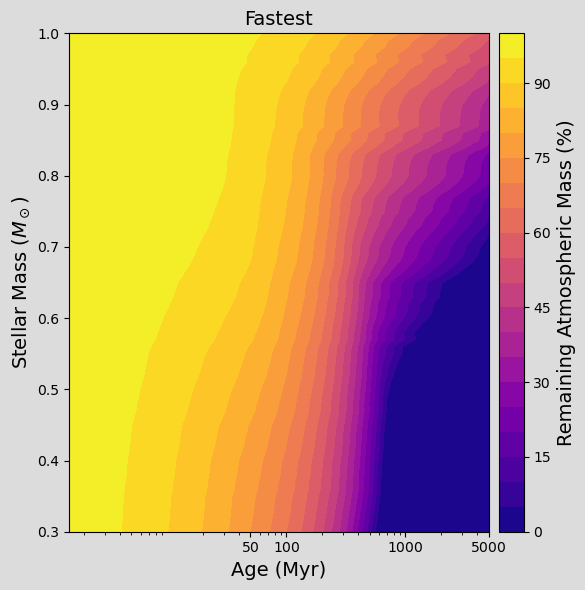

<Figure size 640x480 with 0 Axes>

In [116]:
# Prepare data
tick_positions = [50, 100, 1000, 5000]
tick_labels = [r'$50$', r'$100$', r'$1000$', r'$5000$']

# Data and labels for each subplot
stars = [stars75]
titles = [
    "Fastest"
]

ages = np.linspace(1,5000,10000)

# Create subplots
fig, axs = plt.subplots(1, 1,figsize=(6,6),facecolor='gainsboro', sharey=True)

for i, (star_set, title) in enumerate(zip(stars, titles)):
    masses = [star.Mstar for star in star_set]
    mrem = [np.array(array) for array in fun.massLost(ages, star_set, 0.3, 0.5, fun.findRadius([0.5]),chz, 0.1, 5e-3)]
    
    contour = axs.contourf(ages[1:], masses, mrem, levels=20, cmap='plasma', vmin=0, vmax=100)
    axs.set_xlabel("Age (Myr)", fontsize=14)
    axs.set_title(title, fontsize=14)
    axs.set_xscale('log')
    axs.set_xticks(tick_positions)
    axs.set_xticklabels(tick_labels)
    if i == 0:
        axs.set_ylabel("Stellar Mass ($M_\\odot$)", fontsize=14)

# Add a single colorbar for all plots
cbar = fig.colorbar(contour, ax=axs, pad=0.02)
cbar.set_label('Remaining Atmospheric Mass (%)', fontsize=14)

plt.tight_layout()
plt.show()
plt.savefig('fastest_contour.png',bbox_inches='tight')

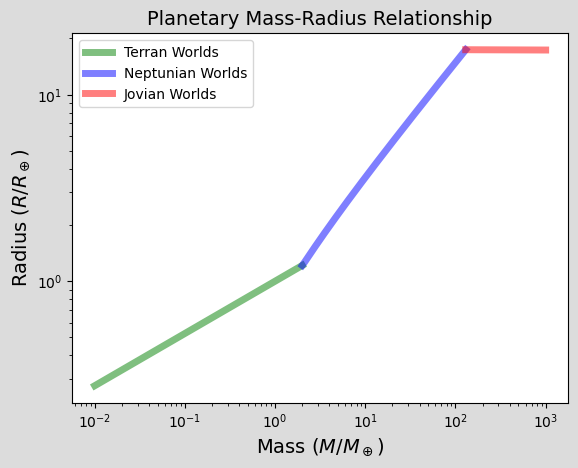

In [12]:
small_masses = np.linspace(0.01,2,100)
medium_masses = np.linspace(2,130,1000)
big_masses = np.linspace(130,1000,1000)

small_radii = fun.findRadius(small_masses)
medium_radii = fun.findRadius(medium_masses)
big_radii = fun.findRadius(big_masses)

plt.figure(facecolor='gainsboro')
plt.plot(small_masses,small_radii,linewidth=5, color='green',alpha=0.5,label='Terran Worlds')
plt.plot(medium_masses,medium_radii,linewidth=5,color='blue',alpha=0.5,label='Neptunian Worlds')
plt.plot(big_masses,big_radii,linewidth=5,color='red',alpha=0.5,label='Jovian Worlds')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mass ($M/M_\oplus$)',fontsize=14)
plt.ylabel('Radius ($R/R_\oplus$)',fontsize=14)
plt.title('Planetary Mass-Radius Relationship',fontsize=14)
plt.legend()

In [13]:
fun.findRadius([130])-fun.findRadius([130.01])

array([16.55102861])

done
done
done


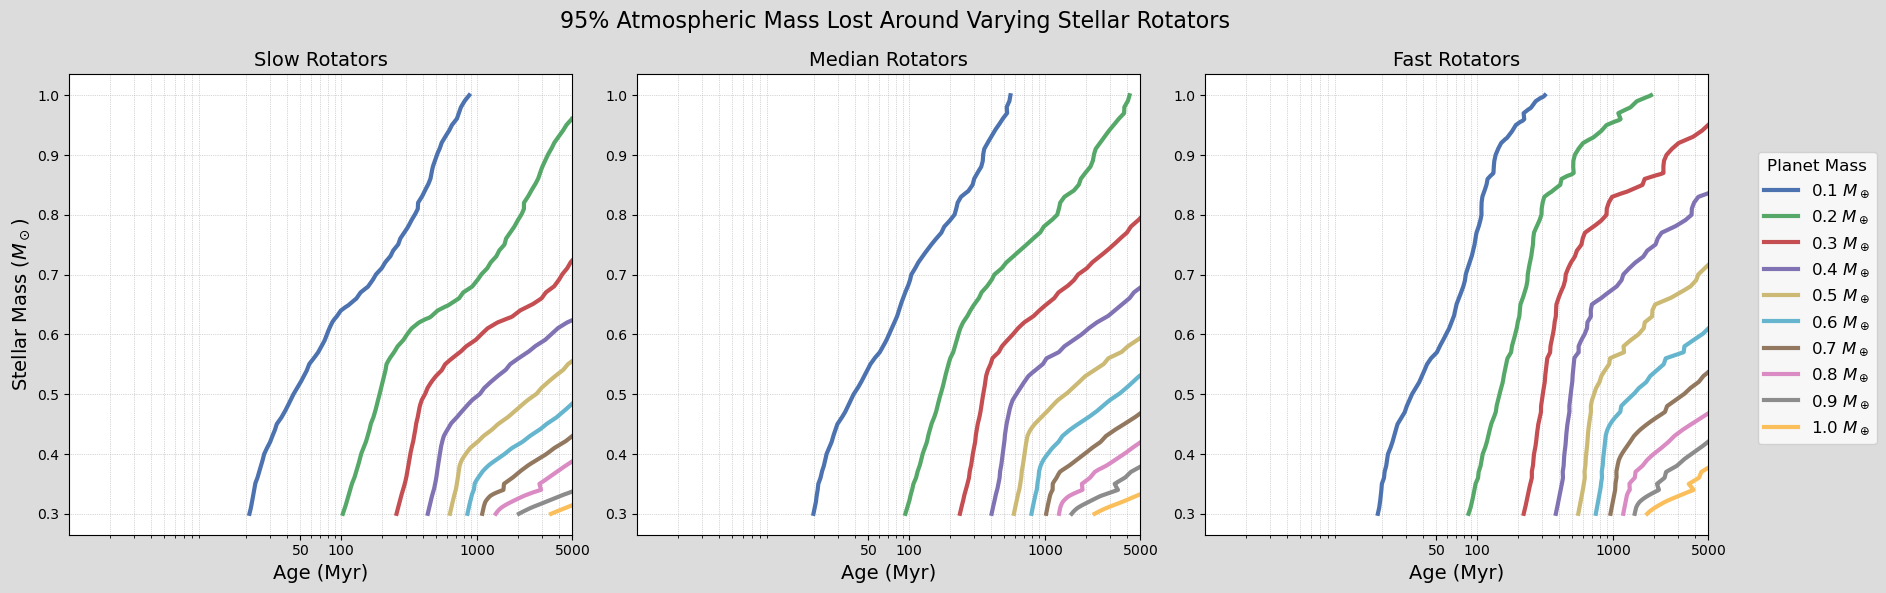

In [117]:
# Data preparation
stars = [stars25, stars50, stars75]
speeds = ['Slow', 'Median', 'Fast']

planet_masses = np.arange(0.1, 1.1, 0.1)
planet_radii = fun.findRadius(planet_masses)

tick_positions = [50, 100, 1000, 5000]
tick_labels = [r'$50$', r'$100$', r'$1000$', r'$5000$']

colors = [
    "#4C72B0", "#55A868", "#C44E52", "#8172B3", "#CCB974",
    "#64B5CD", "#937860", "#DA8BC3", "#8C8C8C", "#FABF5A"
]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), facecolor='gainsboro', sharey=True)
fig.suptitle('95% Atmospheric Mass Lost Around Varying Stellar Rotators',fontsize=16)
# Loop through each star group and subplot
for i, (s, star_group,ax) in enumerate(zip(speeds, stars,axs)):
    
    ax.set_title(f'{s} Rotators', fontsize=14)
    ax.set_xlabel('Age (Myr)', fontsize=14)
    ax.set_xscale('log')
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    ax.tick_params(labelleft=True)
    ax.set_xlim(1,5000)
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    if i == 0:
        ax.set_ylabel('Stellar Mass ($M_\\odot$)', fontsize=14)

    for k,(m, r) in enumerate(zip(planet_masses, planet_radii)):
        ages_contour, masses_contour = fun.plotContours(
            ages, star_group, 0.3, m, r, chz,
            R_atm=0.1, M_atm=5E-3, equations=True, levels=[5]
        )

        
        
        for x, y in zip(ages_contour, masses_contour):
            ax.plot(x, y, label=f'{round(m, 1)} $M_\\oplus$', linewidth=3, color=colors[k])
    
    print('done')

# Add single legend to the right of the last subplot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Planet Mass", fontsize=12, title_fontsize=12,
           loc='center right', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout(rect=[0, 0, 0.97, 1])  # leave space on right for legend
